In [1]:
import math, time
import numpy as np

import matplotlib.pyplot as plt
from CubeView import CubeView
from CyclicSolver import CyclicSolver
from FaceletSolver import FaceletSolver
from DirectCube import DirectCube
from CfopCube import CfopCube, CROSS, F2L
from VectorCube import VectorCube, color_name, color_letr, WHITE_CB, ORANGE_CB, GREEN_CB, RED_CB, BLUE_CB, YELLOW_CB, SIDES

In [26]:
tri_sides = sorted({(sd1,sd2,sd3) for sd1 in SIDES for sd2 in SIDES for sd3 in SIDES 
                    if (sd1 != sd2) and (sd1 != sd3) and (sd2 != sd3)})

In [28]:
print(len(tri_perms))
tri_perms

120


[(1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 3, 2),
 (1, 3, 4),
 (1, 3, 5),
 (1, 3, 6),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 5),
 (1, 4, 6),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 6),
 (1, 6, 2),
 (1, 6, 3),
 (1, 6, 4),
 (1, 6, 5),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 3, 1),
 (2, 3, 4),
 (2, 3, 5),
 (2, 3, 6),
 (2, 4, 1),
 (2, 4, 3),
 (2, 4, 5),
 (2, 4, 6),
 (2, 5, 1),
 (2, 5, 3),
 (2, 5, 4),
 (2, 5, 6),
 (2, 6, 1),
 (2, 6, 3),
 (2, 6, 4),
 (2, 6, 5),
 (3, 1, 2),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 2, 1),
 (3, 2, 4),
 (3, 2, 5),
 (3, 2, 6),
 (3, 4, 1),
 (3, 4, 2),
 (3, 4, 5),
 (3, 4, 6),
 (3, 5, 1),
 (3, 5, 2),
 (3, 5, 4),
 (3, 5, 6),
 (3, 6, 1),
 (3, 6, 2),
 (3, 6, 4),
 (3, 6, 5),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 5),
 (4, 1, 6),
 (4, 2, 1),
 (4, 2, 3),
 (4, 2, 5),
 (4, 2, 6),
 (4, 3, 1),
 (4, 3, 2),
 (4, 3, 5),
 (4, 3, 6),
 (4, 5, 1),
 (4, 5, 2),
 (4, 5, 3),
 (4, 5, 6),
 (4, 6, 1),
 (4, 6, 2),
 (4, 6, 3),
 (4, 6, 5),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5,

Below is a study of the HeuristicState object and how it might be used

In [ ]:
VectorCube._facelet_matrix[]

In [ ]:
def nodeterse(node):
    return f"{color_letr(node.move[0])}({node.move[1]}) : ({hterse(node.hstate)})"

def cubeterse(cube, mv, hstate):
    return f"{color_letr(mv[0])}({mv[1]}) : ({hterse(hstate)})"

def sorted_hstates(cube, prev_mv=None):
    mvcands = VectorCube.MOVES if prev_mv is None else [mv for mv in VectorCube.MOVES if prev_mv[0] != mv[0]]
    return sorted([(DirectSolver.generate_hstate(DirectCube(cube).rotate(mv)), mv) for mv in mvcands], reverse=True)

In [ ]:
last_hs = None
for hs, mv in sorted_hstates(DirectCube().scramble(), prev_mv=(4, 90)):
    if last_hs is None: print(hterse(hs))
    else: print(hterse(hs), mv, f"[got improved: {last_hs.improves(hs)}]")
    last_hs = hs

In [ ]:
lmin_cube = DirectCube().rotate_seq(superflip_scramble)
print(f"Superflip solution: {[f'({color_letr(mv[0])}:{mv[1]})' for mv in superflip_moves]}\n")

view = CubeView(DirectCube(lmin_cube))
for mv in superflip_moves:
    view.viewable_cube.rotate(mv)
    value = hterse(DirectSolver.generate_hstate(view.viewable_cube))
    view.push_snapshot(caption=f"{color_name(mv[0])} ({mv[1]}) : {value}")

view.draw_snapshots()

In [ ]:
for mode in range(1, 3):
#{
    cube = DirectCube(lmin_cube)
    explore_cube = DirectCube(lmin_cube)
    hstate = DirectSolver.generate_hstate(lmin_cube)
    print(f"\nMode: {mode} \nBase: {hterse(hstate)}")

    last_mv = None
    for i, mv in enumerate(superflip_moves):
    #{
        explore_cube.rotate(mv)
        nxt_hstate = DirectSolver.generate_hstate(explore_cube)
        cands = [hterse(hs) for hs, altmv in sorted_hstates(explore_cube, prev_mv=last_mv) if hs.improves(hstate, mode=mode)]       

        if nxt_hstate.improves(hstate, mode=mode):
            hstate = nxt_hstate
            cube = DirectCube(explore_cube)
            print(f"{i+1} : {hterse(nxt_hstate)} : {color_letr(mv[0])}({mv[1]}) : {cands}")

        else: print(f"  {i+1} : {hterse(nxt_hstate)} : {color_letr(mv[0])}({mv[1]}) : {cands}")
        last_mv = mv
    #}
#}

In [ ]:
print(rootnode)
for child in rootnode.child_nodes:
    print(child)

In [ ]:
def nodeterse(node):
    return f"{color_letr(node.move[0])}({node.move[1]}) : ({node.hstate.value}/{node.hstate.face_to_face}/{node.hstate.tight_couple})"

def cubeterse(cube, mv, hstate):
    return f"{color_letr(mv[0])}({mv[1]}) : ({hstate.value}/{hstate.face_to_face}/{hstate.tight_couple})"


def examine_path(direct_cube, node, path):
#{
    for mv in path:
    #{
        ntitle = f"{color_letr(node.move[0])}({node.move[1]})" if node.move else None
        mv_hstate = DirectSolver.generate_hstate(direct_cube.rotate(mv))
        print(f"{ntitle} [{cubeterse(direct_cube, mv, mv_hstate)}]")
    
        found = False
        for child in node.child_nodes:
            print(" ", nodeterse(child))
            if child.move == mv:
                found = True
                node = child
                break
        
        if not found:
            print(" Numb children:", len(node.child_nodes))
            for child in node.child_nodes: print(child)
            break
    #}
#}

direct_cube = DirectCube(starting_cube)
examine_path(direct_cube, rootnode, invmoves)

In [ ]:
def face_to_face(direct_cube):
#{
    lead_dir = direct_cube.direction_matrix[2:, DirectCube._dir_order_ed_ctr]
    foll_dir = direct_cube.direction_matrix[2:, DirectCube._dir_order_cn_ed]
    return sum(lead_dir + foll_dir) == 0
#}

def tightly_hugged(direct_cube):
#{
    lead_pos = direct_cube.facelet_matrix[2:, VectorCube._order_ed_cnt]
    foll_pos = direct_cube.facelet_matrix[2:, VectorCube._order_cn_ed]
    return np.linalg.norm(foll_pos - lead_pos, axis=0) == 2
#}

rowidx1 = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
rowidx2 = np.array([24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47])

def consolidated(direct_cube):
    return np.logical_and(face_to_face(direct_cube), tightly_hugged(direct_cube))

def row_complete(direct_cube):
#{
    consolidated = np.logical_and(face_to_face(direct_cube), tightly_hugged(direct_cube))
    return np.logical_and(consolidated[rowidx1], consolidated[rowidx2])
#}

cornidx1 = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
cornidx2 = np.array([27,24,25,26,31,28,29,30,35,32,33,34,39,36,37,38,43,40,41,42,47,44,45,46])

def corner_complete(direct_cube):
#{
    consolidated = np.logical_and(face_to_face(direct_cube), tightly_hugged(direct_cube))
    return np.logical_and(consolidated[cornidx1], consolidated[cornidx2])
#}

In [ ]:
moves = [(ORANGE_CB, 90), (GREEN_CB, -90), (RED_CB, 90), (YELLOW_CB, -90), (ORANGE_CB, 90), (YELLOW_CB, -90), (ORANGE_CB, -90), (GREEN_CB, 180), (ORANGE_CB, 180), (GREEN_CB, -90), (ORANGE_CB, 180), (GREEN_CB, -90), (WHITE_CB, -90), (GREEN_CB, -90), (ORANGE_CB, 180), (BLUE_CB, -90), (RED_CB, -90), (ORANGE_CB, -90), (BLUE_CB, -90), (WHITE_CB, -90)]
invmoves = [(WHITE_CB, 90), (BLUE_CB, 90), (ORANGE_CB, 90), (RED_CB, 90), (BLUE_CB, 90), (ORANGE_CB, 180), (GREEN_CB, 90), (WHITE_CB, 90), (GREEN_CB, 90), (ORANGE_CB, 180), (GREEN_CB, 90), (ORANGE_CB, 180), (GREEN_CB, 180), (ORANGE_CB, 90), (YELLOW_CB, 90), (ORANGE_CB, -90), (YELLOW_CB, 90), (RED_CB, -90), (GREEN_CB, 90), (ORANGE_CB, -90)]

cube = DirectCube()
view = CubeView(cube)
# view.push_snapshot()

for mv in moves:
    cube.rotate(mv)
    view.push_snapshot(caption=f"{color_name(mv[0])} ({mv[1]})")
    
for invmv in invmoves:
    cube.rotate(invmv)
    view.push_snapshot(caption=f"{color_name(invmv[0])} ({invmv[1]})")
    
view.draw_snapshots()

In [ ]:
with open('excel_headings.csv', "w+") as f_handle:
    for mv in [None] + moves:
        if mv is None: f_handle.write(f",,,,,,,")
        else: f_handle.write(f"{color_letr(mv[0])} ({mv[1]}),,,,,,")
    
    f_handle.write(f"\n")
    for flet_edcnt, flet_cned, in zip(cube.facelet_matrix[:, VectorCube._order_ed_cnt].T, cube.facelet_matrix[:, VectorCube._order_cn_ed].T):
        f_handle.write(f"{color_letr(flet_cned[0])}{flet_cned[1]}:{color_letr(flet_edcnt[0])}{flet_edcnt[1]},\n")

In [ ]:
direct_cube = DirectCube()
str_block = np.ones((72, 126), dtype=int) * -1
for col, mv in enumerate([None] + moves):
#{
    if mv: direct_cube.rotate(mv)
    
    for row, (ftf, thg, cons) in enumerate(zip(face_to_face(direct_cube), tightly_hugged(direct_cube), consolidated(direct_cube))):
        str_block[row, (col*6)]   = f"{1 if ftf  else 0}"
        str_block[row, (col*6)+1] = f"{1 if thg  else 0}"
        str_block[row, (col*6)+2] = f"{1 if cons else 0}"     
        str_block[row, (col*6)+3] = f"{0}"
        str_block[row, (col*6)+4] = f"{0}"

    
    for row, (rwc, cnc) in enumerate(zip(row_complete(direct_cube), corner_complete(direct_cube))):
        str_block[row, (col*6)+3] = f"{1 if rwc else 0}"
        str_block[row, (col*6)+4] = f"{1 if cnc else 0}"
#}

with open('excel_data.csv', "w+") as f_handle:
#{
    for r in range(str_block.shape[0]):
    #{
        for c in range(str_block.shape[1]):
            if str_block[r,c] == -1: f_handle.write(f",")
            else: f_handle.write(f"{str_block[r,c]},")
        f_handle.write(f"\n")
    #}
#}

In [ ]:
direct_cube = DirectCube()
view = CubeView(direct_cube)

# grid = [[]]
# for mv in [None] + moves:
#     if mv: direct_cube.rotate(mv)
#     else: 
        for i, (flet_edcnt, flet_cned) in enumerate(zip(cube.facelet_matrix[:, VectorCube._order_ed_cnt].T, 
                                                        cube.facelet_matrix[:, VectorCube._order_cn_ed].T)):
    

In [ ]:
def get_tops(cube, last_mv):
#{
    dlist, olist = {},{}
    for nxtmv in [cnd for cnd in VectorCube.MOVES if cnd[0] != last_mv[0]]:
        order = fsolver.angle_heuristic(DirectCube(cube).rotate(nxtmv), order=True)
        angle = fsolver.angle_heuristic(DirectCube(cube).rotate(nxtmv), order=False)
        dlist.get(angle, []).append(nxtmv)
        olist.get(order, []).append(nxtmv)

    eltop = 0; topds = []
    for el in sorted(dlist, reverse=True):
        if (eltop == 0) or eltop == el[0]:
            eltop = el[0]; topds.append(el[1])

    eltop = 0; topos = []
    for el in sorted(olist, reverse=True):
        if (eltop == 0) or eltop == el[0]:
            eltop = el[0]; topos.append(el[1])
    
    return topds, topos
#}

In [ ]:
cube = DirectCube()
moves, invmoves = cube.trace_scramble()
cube.rotate_seq(moves)

lstmv = (0, None)
for i, inv in enumerate(invmoves):
    topds, topos = get_tops(cube, lstmv)
    inds = (inv in topds)
    inos = (inv in topos)
    print(i, inds, inos, inv)
    cube.rotate(inv)



In [ ]:
def orderish(cube):
#{
    diff_sq = (cube.facelet_matrix[2:, VectorCube._order_cn_ed] - cube.facelet_matrix[2:, VectorCube._order_ed_cnt])**2
    x = FaceletSolver._x_sq == diff_sq
    y = FaceletSolver._y_sq == diff_sq
    z = FaceletSolver._z_sq == diff_sq
    
    return sum(np.logical_or(np.logical_or(x, y), z)) == 3
#}

def angleish(direct_cube):
#{
    follow_pos = direct_cube.facelet_matrix[2:, VectorCube._order_cn_ed]
    lead_pos   = direct_cube.facelet_matrix[2:, VectorCube._order_ed_cnt]
    lead_dir   = direct_cube.direction_matrix[2:, DirectCube._dir_order_ed_ctr]
    difference = follow_pos - lead_pos

    projection1   = lead_pos**2 != 9
    projection2   = np.logical_xor(projection1, (lead_dir == 0))
    difference_p1 = difference.T[projection1.T].reshape(-1,2).T
    difference_p2 = difference.T[projection2.T].reshape(-1,2).T
    lead_dir_p1   = lead_dir.T[projection1.T].reshape(-1,2).T
    lead_dir_p2   = lead_dir.T[projection2.T].reshape(-1,2).T

    # Div zero guard, occurs only on edge-center case of rad1 == math.pi/2, then
    # rad2 is math.pi/2 or NaN, i.e. there is NO vector projection into 2nd plane
    norm_p2 = np.linalg.norm(difference_p2, axis=0); norm_p2[norm_p2 == 0] = 1.0

    rad1 = np.arccos(sum(np.matmul(difference_p1.T, lead_dir_p1) * FaceletSolver.I_cned) / np.linalg.norm(difference_p1, axis=0))
    rad2 = np.arccos(sum(np.matmul(difference_p2.T, lead_dir_p2) * FaceletSolver.I_cned) / norm_p2)
    return rad1, rad2, difference
#}


In [ ]:
direct_cube = DirectCube().rotate((ORANGE_CB, 90)).rotate((GREEN_CB, -90)).rotate((RED_CB, -90))
rad1, rad2 = fsolver.angle_heuristic(direct_cube)
# print(sum(np.logical_and((r1 == 0), (r2 == 0))))

a = np.logical_and((rad1 == 0), (rad2 == 0))
b = orderish(direct_cube)

print(sum(a))
print(sum(b))

for i, (dc, od, r1, r2) in enumerate(zip(a, b, rad1, rad2)):
    print(i, r1, r2, od)

In [ ]:
same = 0
notsame_set = set()
fail_cube = None
for i in range(10000):
    direct_cube = DirectCube().scramble()
    
    order = fsolver.order_heuristic(direct_cube)
    angle = fsolver.angle_heuristic(direct_cube)
    if order == angle: same += 1
    
#     orders = orderish(direct_cube)
#     rad1, rad2, diff = angleish(direct_cube)
#     zero_equality = np.logical_and((rad1 == 0), (rad2 == 0))
#     pi_equality   = np.logical_and((rad1 == np.pi), (rad2 == np.pi))
#     pi2_equality  = np.logical_and((rad1 == np.pi/2), (rad2 == np.pi/2))
#     angles = np.logical_or(np.logical_or(zero_equality, pi_equality), pi2_equality)

#     if sum(orders) == sum(angles): same += 1
#     else: fail_cube = direct_cube; break
#         for dc, od, r1, r2 in zip(angles, orders, rad1, rad2):
#             if od != dc: notsame_set.add((r1,r2))

print(same, same/10000)
print(notsame_set)


In [ ]:
CubeView(fail_cube).draw_projection()
order = fsolver.order_heuristic(fail_cube)
angle = fsolver.angle_heuristic(fail_cube)
print(order, angle)

orders = orderish(fail_cube)
rad1, rad2, diff = angleish(fail_cube)
zero_equality = np.logical_and((rad1 == 0), (rad2 == 0))
pi_equality   = np.logical_and((rad1 == np.pi), (rad2 == np.pi))
pi2_equality  = np.logical_and((rad1 == np.pi/2), (rad2 == np.pi/2))
angles = np.logical_or(np.logical_or(zero_equality, pi_equality), pi2_equality)
print(sum(orders), sum(angles))

# print(orders)
# print(angles)
# print(orders == angles)
# print(pi2_equality)

# for dc, od, r1, r2 in zip(angles, orders, rad1, rad2):
#     if od != dc: print(r1 == np.pi/2, r2 == np.pi/2)

print("\nUnequal:\n")
for i, (a,b,c,dc,od, r1, r2, df) in enumerate(zip(zero_equality, pi_equality, pi2_equality, angles, orders, rad1, rad2, diff.T)):
    if (od != dc):
        print(i, dc, od, r1, r2, np.linalg.norm(df))
        CubeView(fail_cube).draw_projection(flet_idx=[VectorCube._order_cn_ed[i], VectorCube._order_ed_cnt[i]])

print("Equal:\n")
for i, (a,b,c,dc,od, r1, r2, df) in enumerate(zip(zero_equality, pi_equality, pi2_equality, angles, orders, rad1, rad2, diff.T)):
    if (od == dc) and c:
        print(i, dc, od, r1, r2, np.linalg.norm(df))
        CubeView(fail_cube).draw_projection(flet_idx=[VectorCube._order_cn_ed[i], VectorCube._order_ed_cnt[i]])

In [ ]:
x_sq = np.broadcast_to(np.array([[9,0,0]]).T, (3, 54))
y_sq = np.broadcast_to(np.array([[0,9,0]]).T, (3, 54))
z_sq = np.broadcast_to(np.array([[0,0,9]]).T, (3, 54))

In [ ]:
%%time

for i in range(50000):
    dcube = DirectCube().scramble()
    a = np.linalg.norm(dcube.facelet_matrix[2:], axis=0) == 3
    

In [ ]:
%%time

for i in range(50000):
    c_sq = DirectCube().scramble().facelet_matrix[2:]**2
    a = sum(np.logical_or(np.logical_or((x_sq == c_sq), (y_sq == c_sq)), (z_sq == c_sq))) == 3

Below is a other stuff

In [3]:
def face_to_face(direct_cube):
#{
    lead_dir = direct_cube.direction_matrix[2:, DirectCube._dir_order_ed_ctr]
    foll_dir = direct_cube.direction_matrix[2:, DirectCube._dir_order_cn_ed]
    return sum(lead_dir + foll_dir) == 0
#}

def tightly_hugged(direct_cube):
#{
    lead_pos = direct_cube.facelet_matrix[2:, VectorCube._order_ed_cnt]
    foll_pos = direct_cube.facelet_matrix[2:, VectorCube._order_cn_ed]
    return np.linalg.norm(foll_pos - lead_pos, axis=0) == 2
#}

rowidx1 = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
rowidx2 = np.array([24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47])

def row_complete(direct_cube):
#{
    consolidated = np.logical_and(face_to_face(direct_cube), tightly_hugged(direct_cube))
    return np.logical_and(consolidated[rowidx1], consolidated[rowidx2])
#}

cornidx1 = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
cornidx2 = np.array([27,24,25,26,31,28,29,30,35,32,33,34,39,36,37,38,43,40,41,42,47,44,45,46])

def corner_complete(direct_cube):
#{
    consolidated = np.logical_and(face_to_face(direct_cube), tightly_hugged(direct_cube))
    return np.logical_and(consolidated[cornidx1], consolidated[cornidx2])
#}

0 W0:W1
24 W2:W1
1 W2:W5
25 W8:W5
2 W8:W7
26 W6:W7
3 W6:W3
27 W0:W3
4 O0:O1
28 O2:O1
5 O2:O5
29 O8:O5
6 O8:O7
30 O6:O7
7 O6:O3
31 O0:O3
8 G0:G1
32 G2:G1
9 G2:G5
33 G8:G5
10 G8:G7
34 G6:G7
11 G6:G3
35 G0:G3
12 R0:R1
36 R2:R1
13 R2:R5
37 R8:R5
14 R8:R7
38 R6:R7
15 R6:R3
39 R0:R3
16 B0:B1
40 B2:B1
17 B2:B5
41 B8:B5
18 B8:B7
42 B6:B7
19 B6:B3
43 B0:B3
20 Y0:Y1
44 Y2:Y1
21 Y2:Y5
45 Y8:Y5
22 Y8:Y7
46 Y6:Y7
23 Y6:Y3
47 Y0:Y3



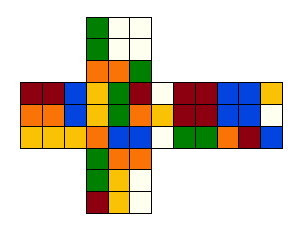

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]]




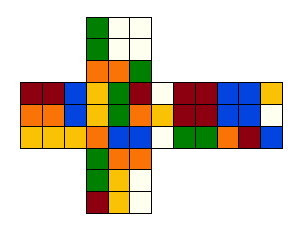

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]]
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
 [27 24 25 26 31 28 29 30 35 32 33 34 39 36 37 38 43 40 41 42 47 44 45 46]]


array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False])

In [4]:
direct_cube = DirectCube().scramble(sz=5)
lead_dir = direct_cube.direction_matrix[:, DirectCube._dir_order_ed_ctr]
foll_dir = direct_cube.direction_matrix[:, DirectCube._dir_order_cn_ed]

ff = face_to_face(direct_cube)
th = tightly_hugged(direct_cube)
consolidated = np.logical_and(ff, th)

ridx1, ridx2 = [],[]
for row in range(24):
    corn = (row+1)%24
    a, b, c = row, (24+row), (48+row)
    ca, cb, cc = corn, (24+corn), (48+corn)
    print(f"{a} {color_letr(foll_dir[0,a])}{foll_dir[1,a]}:{color_letr(lead_dir[0,a])}{lead_dir[1,a]}")
    print(f"{b} {color_letr(foll_dir[0,b])}{foll_dir[1,b]}:{color_letr(lead_dir[0,b])}{lead_dir[1,b]}")
    #print(f"{c} {color_letr(foll_dir[0,c])}{foll_dir[1,c]}:{color_letr(lead_dir[0,c])}{lead_dir[1,c]}")
    ridx1.append(a)
    ridx2.append(b)

print()
CubeView(direct_cube).draw_projection()
print(np.array([ridx1, ridx2]))
np.logical_and(consolidated[ridx1], consolidated[ridx2])
print()

cidx1, cidx2 = [],[]
for i, (ca,cb) in enumerate(zip(ridx1, ridx2)):
    cidx1.append(ca)
    if (i%4) != 3:
        cidx2.append(cb)
    else:
#         cidx1.insert(i-3, ca)
        cidx2.insert(i-3, cb)

# cidx1 = list(cidx1)
# cidx2 = list(cidx2)
        
print()
CubeView(direct_cube).draw_projection()
print(np.array([ridx1, ridx2]))
print(np.array([cidx1, cidx2]))

# for a,b in zip(cidx1, cidx2):
#     print(f"{a} {color_letr(foll_dir[0,a])}{foll_dir[1,a]}:{color_letr(lead_dir[0,a])}{lead_dir[1,a]}")
#     print(f"{b} {color_letr(foll_dir[0,b])}{foll_dir[1,b]}:{color_letr(lead_dir[0,b])}{lead_dir[1,b]}")

consolidated = np.logical_and(face_to_face(direct_cube), tightly_hugged(direct_cube))
np.logical_and(consolidated[cornidx1], consolidated[cornidx2])

In [ ]:
direct_cube = DirectCube()

print(DirectCube._dir_order_ed_ctr)
direct_cube.direction_matrix[:, DirectCube._dir_order_ed_ctr]
# for dlet in a[:, a[1]==4].T:
#     print(dlet)


In [ ]:
dir_order_cn_ed = []
for loop in range(3):
    for idx in VectorCube._order_cn_ed[(loop*24):(loop*24 + 24)]:
        dir_order_cn_ed.append(DirectCube.get_direction_index(idx)[loop])
        
print(np.array(dir_order_cn_ed))
direct_cube.direction_matrix[:, dir_order_cn_ed]
# for i, dlet in enumerate(direct_cube.direction_matrix[:, dir_order_cn_ed].T):
#     print(i, dlet)

dir_order_ed = []
for loop in range(3):
    for idx in VectorCube._order_ed[(loop*24):(loop*24 + 24)]:
        dir_order_ed.append(DirectCube.get_direction_index(idx)[loop])

print(np.array(dir_order_ed))
direct_cube.direction_matrix[:, dir_order_ed]


In [5]:
def calc_angle(cube):
#{
    W0 = cube.facelet_matrix[2:, 0]
    W1 = cube.facelet_matrix[2:, 1]
    diff = W0 - W1
    
    d0W1 = cube.direction_matrix[2:, cube.get_direction_index(1)[0]]
    
    proj1 = (W1**2 != 9)
    proj2 = np.logical_xor(proj1, (d0W1 == 0))
    
#     print("W0:  ", W0)
#     print("W1:  ", W1)
#     print("Diff:", diff, diff[proj1], diff[proj2])
#     print("d0W1 ", d0W1, d0W1[proj1], d0W1[proj2])

    if ((np.linalg.norm(diff[proj1]) == 0) or (np.linalg.norm(diff[proj2]) == 0)):
        print("Div by zero:", diff, diff[proj1], diff[proj2])
        print(proj1)
        print(d0W1 == 0)
        print(proj2)
        CubeView(cube).draw_projection(flet_idx=[0,1])
        return None, None

    rad1 = np.arccos(diff[proj1].dot(d0W1[proj1])/np.linalg.norm(diff[proj1]))
    rad2 = np.arccos(diff[proj2].dot(d0W1[proj2])/np.linalg.norm(diff[proj2]))
    
#     print(f"{rad1} ({rad1*180/math.pi} deg)")
#     print(f"{rad2} ({rad2*180/math.pi} deg) \n")

    return rad1, rad2
#}

direct_cube = DirectCube()
calc_angle(direct_cube)

# direct_cube.rotate((ORANGE_CB, 90))
# calc_angle(direct_cube)

# direct_cube.rotate((GREEN_CB, -90))
# calc_angle(direct_cube)

# direct_cube.rotate((RED_CB, -90))
# calc_angle(direct_cube)

(0.0, 0.0)

In [ ]:
def _flatten(values):
#{
    flat_values = []
    for v in values:
        if isinstance(v, list): flat_values = _flatten(v)
        else: flat_values.append(v)
    
    return(flat_values)
#}

def _get_perms(total_moves, base_elements, values=None, depth=0):
#{    
    perms = None
    if depth < total_moves: 
        if values is None: values = base_elements
        else: values = [[i]+[j] for i, j in itertools.product(values, base_elements)]
        perms = _get_perms(total_moves, base_elements, values, depth+1)

        flat_values = [_flatten(v) for v in values if isinstance(v, list)]
        perms |= {tuple(v) for v in flat_values if sum(v) == total_moves}
        
    else: perms = set()
    return perms
#}

def get_permutations(total_moves, element_sz=3):
#{
    assert total_moves <= 14, f"Too wide: {total_moves}"
    base_elements = [i+1 for i in range(element_sz)]
    return(sorted(_get_perms(total_moves, base_elements)))
#}

print(get_permutations(4))

class MoveSet:
#{
    def __init__(self, number_moves):
        self.number_moves = number_moves
        self.allowed = [[] for i in range(number_moves)]
        self.disallowed = [[] for i in range(number_moves)]
        self.permutations = self._get_perms(numb_moves)
        self.reset_iterators()
        
    def set_allowed(allowed_flet, mv_numb):
        self.allowed[mv_numb] = list(allowed_flet)

    def set_disallowed(disallowed_flet, mv_numb):
        self.disallowed[mv_numb] = list(disallowed_flet)
    
    def reset_iterators():
        self.perm_iter
    
    def _flatten(self, values):
    #{
        flat_values = []
        for v in values:
            if isinstance(v, list): flat_values = self._flatten(v)
            else: flat_values.append(v)

        return(flat_values)
    #}

    def _get_perms(self, total_moves, base_elements, values=None, depth=0):
    #{    
        perms = None
        if depth < total_moves: 
            if values is None: values = base_elements
            else: values = [[i]+[j] for i, j in itertools.product(values, base_elements)]
            perms = self._get_perms(total_moves, base_elements, values, depth+1)

            flat_values = [self._flatten(v) for v in values if isinstance(v, list)]
            perms |= {tuple(v) for v in flat_values if sum(v) == total_moves}

        else: perms = set()
        return perms
    #}
    
    def get_permutations(self, total_moves, element_sz=3):
    #{
        assert total_moves <= 14, f"Too wide: {total_moves}"
        base_elements = [i+1 for i in range(element_sz)]
        return(sorted(self._get_perms(total_moves, base_elements)))
    #}
    
    # Have to iterate through
    # 1) permutation nmoves list (per flet?)
    # 2) position_hash pos list (per permutation somehow?)
    # 3) psequence_hash move-seq list (per to-from position pair)
    # 
    # What, if anything, does a conflict allow me to prune?
    
    def _gen_traj(self, pos, epos, perm, fsolver, step=0):
        
        if step < len(perm):
            fsolver.position_hash[fsolver.position_k(pos, perm[step])]:
            
            if nxt_pos is None:
                nxt_pos = fsolver.position_hash[fsolver.position_k(flet[2:], nmoves)]
            
            self._gen_traj(depth+1)
        
    
    def solve_cube(start_cube, end_cube, fsolver):
    #{
        trajectory_perms = self.get_permutations(self.number_moves)
        for flet, endlet in zip(start_cube.facelet_matrix[:,VectorCube._movableindex],
                                end_cube.facelet_matrix[:,VectorCube._movableindex]):
            
            pos_k = fsolver.psequence_k(flet[2:], endlet[2:])
            
            for perm in trajectory_perms:
                for nmoves in perm:
                    for nxt_pos in fsolver.position_hash[fsolver.position_k(flet[2:], nmoves)]:
                        
                                        
    
        pos_k = self.fsolver.psequence_k(flet[2:], VectorCube._facelet_matrix[2:,1])

        self.fsolver.position_hash
        
        for mv_numb in number_moves:

        list({CfopCube(start_cube).rotate(mv).facelet_matrix[:, index] for mv in VectorCube.MOVES})
    #}
#}

index, number_moves = 0, 4
move_set = MoveSet(fsolver, number_moves)
start_cube, end_cube = CfopCube().scramble(), CfopCube()


move_set.generate_trajectory(start_cube, end_cube, index)


In [ ]:
corners, edges, centers, ed_ctr = [],[],[],[]
for i, tface in enumerate(direct_cube.direction_matrix.T):
    if sum(np.array([0,2,6,8]) == tface[1]) > 0: corners.append(i)
    if sum(np.array([1,3,5,7]) == tface[1]) > 0: edges.append(i)
    if (sum(np.array([1,3,5,7]) == tface[1]) > 0) and (i < 97): ed_ctr.append(i)
    if (tface[1] == 4) > 0: ed_ctr.append(i)

#print(corners, len(corners))
#print(edges, len(edges))
print(ed_ctr, len(ed_ctr))
#print(centers, len(centers))

print(DirectCube.get_direction_index([1]))
print(direct_cube.direction_matrix[:, DirectCube.get_direction_index([1])])
direct_cube.direction_matrix[:, ed_ctr]

In [ ]:
tw_order_cn, tw_order_ed = [], []
for i, tface in enumerate(twist_cube.twist_matrix.T):
    if (i%2) == 0: tw_order_cn.append(i)
    else: tw_order_ed.append(i)
    if tface[1] == 4: tw_order_ed.append(i)
    
print(tw_order_cn, len(tw_order_cn))
print(tw_order_ed, len(tw_order_ed))

In [ ]:
twist_cube.twist_matrix[:,(twist_cube.twist_matrix[0,:] == WHITE_CB)]

In [ ]:
twist_cube = DirectCube()

tindex = np.ones((5,54), dtype=int) * -1
for i, flet in enumerate(VectorCube._facelet_matrix.T):
    row = 2
    tindex[:2,i] = flet[:2]
    for j, tface in enumerate(TwistCube.twist_matproto().T):
        if sum(tface[:2] == flet[:2]) == 2:
            print(f"{row}, {i}, {j}")
            tindex[:2,i] = flet[:2]
            tindex[row,i] = j
            row += 1

print(tindex)
print(tindex.shape)

for i, js in enumerate(tindex.T):
    if js[4] != -1: print(i, js)
        


In [ ]:
twist_cube = TwistCube()
for side in SIDES: print(twist_cube.get_facelet_indices(side))

print()
for side in SIDES:
    cindex = twist_cube.get_facelet_indices(side)
    print(twist_cube.get_twist_index(cindex))

print()
twist_cube.scramble()
for side in SIDES: print(twist_cube.get_facelet_indices(side))

print()
for side in SIDES:
    cindex = twist_cube.get_facelet_indices(side)
    print(twist_cube.get_twist_index(cindex))

In [ ]:
# cicn_block = VectorCube._facelet_matrix[:, VectorCube._order_cn]
# cied_block = VectorCube._facelet_matrix[:, VectorCube._order_ed]
# diff_block = cicn_block[2:] - cied_block[2:]

# tindex = 0
# twist_matrix = np.zeros((5,120), dtype=int)
# for diffv, cicn, cied in zip(diff_block.T , cicn_block.T, cied_block.T):
# #{
#     if cicn[1] != 4:
#         twist_matrix[:2, tindex] = cicn[:2]
#         twist_matrix[2:, tindex] = diffv
#         tindex += 1

#     twist_matrix[:2, tindex] = cied[:2]
#     twist_matrix[2:, tindex] = diffv
#     tindex += 1
# #}

In [ ]:
cicn_block = VectorCube._facelet_matrix[:, VectorCube._order_cn]
cied_block = VectorCube._facelet_matrix[:, VectorCube._order_ed]
diff_block = cicn_block[2:] - cied_block[2:]

tindex = 0
twist_matrix = np.zeros((5,144), dtype=int)
for diffv, cicn, cied in zip(diff_block.T , cicn_block.T, cied_block.T):
#{
    twist_matrix[:2, tindex]   = cicn[:2]
    twist_matrix[:2, tindex+1] = cied[:2]
    twist_matrix[2:, tindex]   = diffv
    twist_matrix[2:, tindex+1] = diffv
    tindex += 2
#}

twist_matrix


In [ ]:
twist_cube = CfopCube()
twist_matrix = np.zeros((5,120), dtype=int)

diff = (twist_cube.facelet_matrix[2:, FaceletSolver._order_cn] - 
        twist_cube.facelet_matrix[2:, FaceletSolver._order_ed])
sdiff = sum(diff)

tindex = 0
for i, v in enumerate(diff.T):
    cicn = twist_cube.facelet_matrix[:, FaceletSolver._order_cn[i]]
    cied = twist_cube.facelet_matrix[:, FaceletSolver._order_ed[i]]
    
    if cicn[1] != 4:
        twist_matrix[0, tindex]  = cicn[0]
        twist_matrix[1, tindex]  = cicn[1]
        twist_matrix[2:, tindex] = -v
        tindex += 1
    
    twist_matrix[0, tindex]  = cied[0]
    twist_matrix[1, tindex]  = cied[1]
    twist_matrix[2:, tindex] = v
    tindex += 1
    
#         print(i, ":", f"{color_letr(cicn[0])}{cicn[1]}-{color_letr(cied[0])}{cied[1]}", ":", sdiff[i])
    print(tindex, ":", i, ":", f"{color_letr(cicn[0])}{cicn[1]}-{color_letr(cied[0])}{cied[1]}", 
          ":", f"{cicn[2:]} - {cied[2:]}", ":", v, ":", sdiff[i])
print()

for side in SIDES:
     print(f"{color_name(side)}_CB: {twist_cube.get_facelet_indices(side)}")

for side in SIDES:
    twist_index = []
    for index in twist_cube.get_facelet_indices(side):
    #{
        ci = twist_cube.facelet_matrix[:2, index]
        for i, tface in enumerate(twist_matrix.T):
            if (tface[0] == ci[0]) and (tface[1] == ci[1]):
                twist_index.append(i)
    #}
    
    print(f"{color_name(side)}_CB: np.array({twist_index}),")

print()
# twist_matrix[:,[0,1,2,3,4,5,6,7, 48,49,50,51,52,53,54,55]]
# twist_matrix[:,[96,97,98,99]]
twist_matrix

In [ ]:
%%time

fsolver = FaceletSolver()
position_hash = fsolver.create_position_hash()
sequence_hash = fsolver.create_sequence_hash(wildcard=False)
heuristic_hash = fsolver.create_heuristic_hash(sequence_hash)
psequence_hash = fsolver.create_psequence_hash(wildcard=False)

In [ ]:
######################################################################################
# The position_hash provides a list of move_sequences to permute a facelet from:
#
#         [any_cube_pos] -> [any_other_reachable_pos], where the
#         map key is k = ((any_cube_pos), (any_other_reachable_pos))
#
# Note that (if position_hash wildcard=False, i.e. hash contains only minimal
# move sequences), there may be one or more move_sequences in the list (per key),
# but each of those move_sequences will be the same length. More explicitly, 
#
#   if k is ((pos_a), (pos_a)), there will be (9 or 12) length-1 move_sequences
#   if k reps 1-move-away, list will contain only one length-1 move_sequence
#   if k reps 2-moves-away, list will contain multiple (3-4) length-2 move_sequences
#   if k reps 3-moves-away, list will contain multiple (4) length-3 move_sequences
#
######################################################################################

In [ ]:
flet_set = set()
for i in range(10000):
    cube = CfopCube().scramble()
    flet_set.add(tuple(cube.facelet_matrix[:,1]))

In [ ]:
flet = VectorCube._facelet_matrix[:,0]
# flet = VectorCube._facelet_matrix[:,1]
print(f"({tuple(flet[2:])}, 1) :", fsolver.position_hash[(tuple(flet[2:]),1)], ":", len(fsolver.position_hash[(tuple(flet[2:]),1)]))
print(f"({tuple(flet[2:])}, 2) :", fsolver.position_hash[(tuple(flet[2:]),2)], ":", len(fsolver.position_hash[(tuple(flet[2:]),1)]))
print(f"({tuple(flet[2:])}, 3) :", fsolver.position_hash[(tuple(flet[2:]),3)], ":", len(fsolver.position_hash[(tuple(flet[2:]),1)]))

In [ ]:
print("Length:", len(flet_set))
for flet in sorted(flet_set):
    pos_k = fsolver.position_k(flet[2:], VectorCube._facelet_matrix[2:,1])
    string = "" if sum(flet[2:] == VectorCube._facelet_matrix[2:,1]) != 3 else "0/"
    print(f"{string}{fsolver.heuristic_hash[flet]}", ":", pos_k, ":", fsolver.psequence_hash[pos_k])

In [7]:
def get_index(colors, cis):
#{
    index = [i for side, ci in zip(colors, cis) for i, flet
             in enumerate(VectorCube._facelet_matrix.T) 
             if (flet[0] == side) and (flet[1] == ci)]

    return np.array(index)
#}

# cis = [0,1, 1,2, 2,5, 5,8, 8,7, 7,6, 6,3, 3,1]
# cis = [0,1,2,5,8,7,6,3]
# for sd in SIDES: print(color_name(sd), get_index(np.broadcast_to([sd], (16,)), cis))

def get_flet(colors, cis):
#{
    flets = [flet for side, ci in zip(colors, cis) for i, flet
             in enumerate(VectorCube._facelet_matrix.T) 
             if (flet[0] == side) and (flet[1] == ci)]

    return flets
#}
    
# cis = [0,1,2,5,8,7,6,3]
# for sd in SIDES: print(color_name(sd), get_flet(np.broadcast_to([sd], (16,)), cis))

all_pairs = []
cubelet_pairs = {}
corn_cis, edge_cis = np.array([0,2,6,8]), np.array([1,3,5,7])
# for i_root, flet_root in enumerate(VectorCube._facelet_matrix.T):
for sd in SIDES:
#{
    cubelet_pairs[sd] = []
    for i_root, flet_root in zip(get_index(np.broadcast_to([sd], (16,)), [0,1,2,5,8,7,6,3]),
                                 get_flet(np.broadcast_to([sd], (16,)), [0,1,2,5,8,7,6,3])):
    #{
        if (sum(corn_cis == flet_root[1]) > 0):
            corner = flet_root[2:]
            for i, flet in enumerate(VectorCube._facelet_matrix.T):
                if (sum(corn_cis == flet[1]) > 0) and (corner.dot(flet[2:]) == 16):
                    cubelet_pairs[sd].append(tuple((i_root,i)))
                    all_pairs.append(tuple((i_root,i)))
#                     print(f"corn: {tuple((i_root,i))}, {color_letr(flet[0])}{flet[1]} : {corner.dot(flet[2:])}")

        elif (sum(edge_cis == flet_root[1]) > 0):
            edge = flet_root[2:]
            for i, flet in enumerate(VectorCube._facelet_matrix.T):
                if (sum(edge_cis == flet[1]) > 0) and (edge.dot(flet[2:]) == 12):
                    cubelet_pairs[sd].append(tuple((i_root,i)))
                    all_pairs.append(tuple((i_root,i)))
#                     print(f"edge: {color_letr(flet[0])}{flet[1]} : {edge.dot(flet[2:])}")
    #}
#}

for side in cubelet_pairs.keys():
    print(f"{color_name(side)}_CB: {cubelet_pairs[side]},")
    
# print(all_pairs)

WHITE_CB: [(0, 9), (0, 38), (1, 37), (2, 29), (2, 36), (5, 28), (8, 20), (8, 27), (7, 19), (6, 11), (6, 18), (3, 10)],
ORANGE_CB: [(9, 0), (9, 38), (10, 3), (11, 6), (11, 18), (14, 21), (17, 24), (17, 45), (16, 48), (15, 44), (15, 51), (12, 41)],
GREEN_CB: [(18, 6), (18, 11), (19, 7), (20, 8), (20, 27), (23, 30), (26, 33), (26, 47), (25, 46), (24, 17), (24, 45), (21, 14)],
RED_CB: [(27, 8), (27, 20), (28, 5), (29, 2), (29, 36), (32, 39), (35, 42), (35, 53), (34, 50), (33, 26), (33, 47), (30, 23)],
BLUE_CB: [(36, 2), (36, 29), (37, 1), (38, 0), (38, 9), (41, 12), (44, 15), (44, 51), (43, 52), (42, 35), (42, 53), (39, 32)],
YELLOW_CB: [(45, 17), (45, 24), (46, 25), (47, 26), (47, 33), (50, 34), (53, 35), (53, 42), (52, 43), (51, 15), (51, 44), (48, 16)],


In [8]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a**2

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

[0, 2, 8, 6, 9, 11, 17, 15, 18, 20, 26, 24, 27, 29, 35, 33, 36, 38, 44, 42, 45, 47, 53, 51]
[1, 5, 7, 3, 10, 14, 16, 12, 19, 23, 25, 21, 28, 32, 34, 30, 37, 41, 43, 39, 46, 50, 52, 48]
[2, 8, 6, 0, 11, 17, 15, 9, 20, 26, 24, 18, 29, 35, 33, 27, 38, 44, 42, 36, 47, 53, 51, 45]


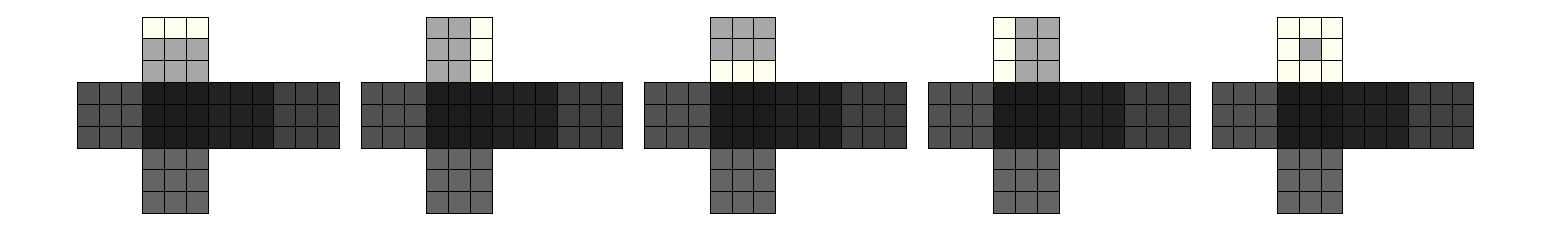

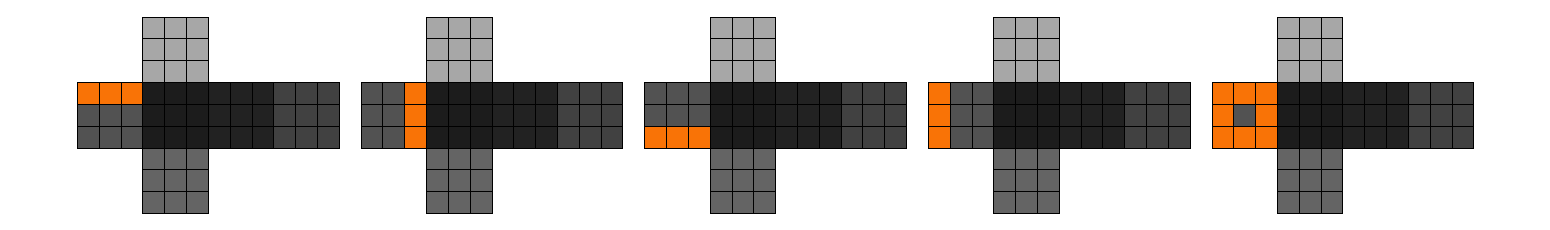

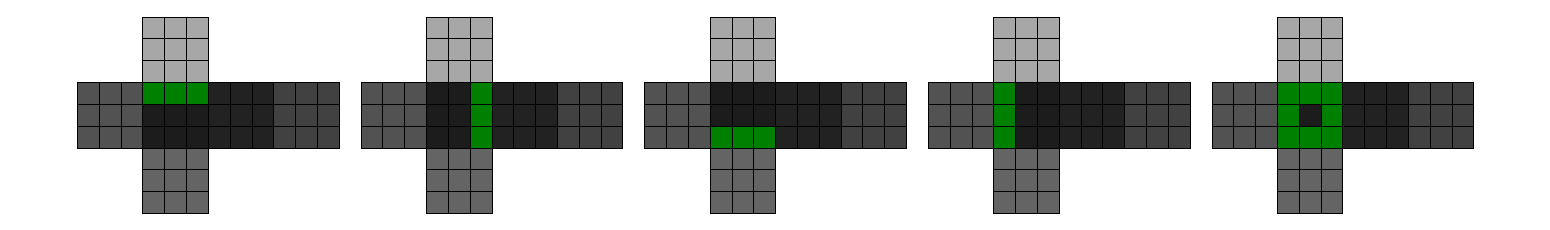

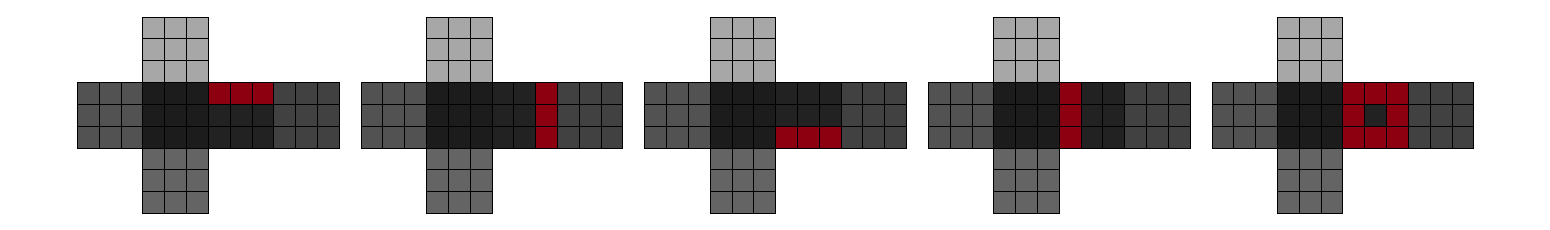

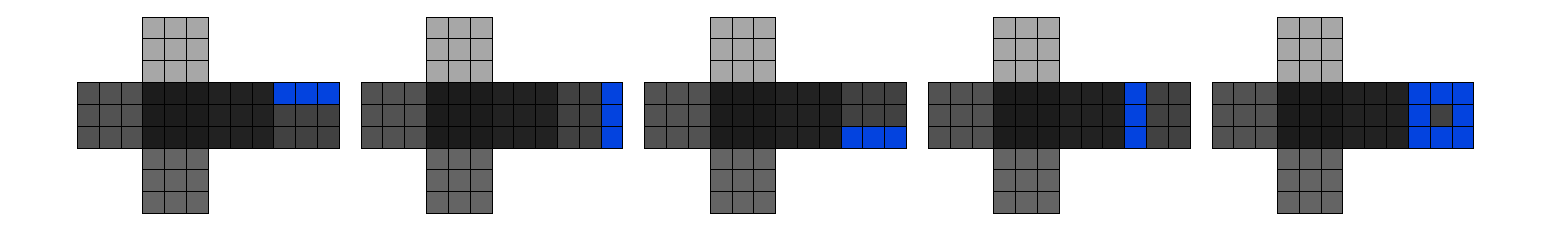

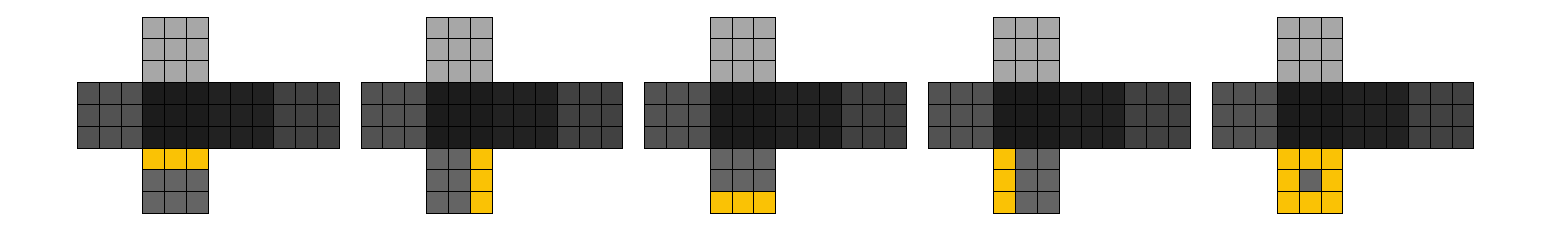

In [9]:
corn_idx = [i for sd in SIDES for i in get_index(np.broadcast_to([sd], (16,)), [0,2,8,6])]
edge_idx = [i for sd in SIDES for i in get_index(np.broadcast_to([sd], (16,)), [1,5,7,3])]
corn_idx_shft = [i for sd in SIDES for i in get_index(np.broadcast_to([sd], (16,)), [2,8,6,0])]

print(corn_idx)
print(edge_idx)
print(corn_idx_shft)

ring = []
view = CubeView(CfopCube())
for i, bar in enumerate(np.array([corn_idx, edge_idx, corn_idx_shft]).T):
    ring.extend(bar)
    view.push_snapshot(flet_idx=bar)
    if ((i+1) % 4) == 0:
        view.push_snapshot(flet_idx=ring)
        view.draw_snapshots()
        view = CubeView(CfopCube())
        ring = []

In [ ]:
for side in SIDES:
#{
    quads = []
    for ci_pair in CfopCube.CFOP_IDXS[(F2L, side)]:
    #{
        corner = VectorCube._facelet_matrix[:,ci_pair[0]]
        edge = VectorCube._facelet_matrix[:,ci_pair[1]]
    
        eidx2 = None
        for pair in all_pairs:
            if ci_pair[1] == pair[0]: eidx2 = pair[1]
            elif ci_pair[1] == pair[1]: eidx2 = pair[0]
        
        edge2 = VectorCube._facelet_matrix[:,eidx2]
        
        cidx2 = None
        for pair in all_pairs:
            color0 = VectorCube._facelet_matrix[0,pair[0]]
            color1 = VectorCube._facelet_matrix[0,pair[1]]
            
            if (ci_pair[0] == pair[0]) and (color1 == edge2[0]): cidx2 = pair[1]
            elif (ci_pair[0] == pair[1]) and (color0 == edge2[0]): cidx2 = pair[0]
            
#             if(pair[0] == 51): 
#                 print(ci_pair, pair, eidx2, f"[{cidx2}]",
#                       f"{color_letr(color1)}:{color_letr(edge2[0])}", (ci_pair[0] == pair[0]), (color1 == edge2[0]),
#                       f"{color_letr(color0)}:{color_letr(edge2[0])}", (ci_pair[0] == pair[1]), (color0 == edge2[0]))
        
        quads.append(tuple((ci_pair[0], ci_pair[1], cidx2, eidx2)))
    #}
    
    print(f"(F2L, {color_name(side)}_CB): np.array({quads}),")
#}

In [ ]:

cube = CfopCube()
quad = (38, 41, 9, 12)
CubeView(cube).draw_projection(flet_idx=quad)

diff_sq1 = (cube.facelet_matrix[2:, quad[0]] - cube.facelet_matrix[2:,quad[1]])**2
diff_sq2 = (cube.facelet_matrix[2:, quad[2]] - cube.facelet_matrix[2:, quad[3]])**2
# if (((sum(diff_sq1 == np.array([4, 0, 0])) == 3) or 
#      (sum(diff_sq1 == np.array([0, 4, 0])) == 3) or
#      (sum(diff_sq1 == np.array([0, 0, 4])) == 3)) and 
#     ((sum(diff_sq2 == np.array([4, 0, 0])) == 3) or 
#      (sum(diff_sq2 == np.array([0, 4, 0])) == 3) or
#      (sum(diff_sq2 == np.array([0, 0, 4])) == 3))):


return ((sum(sum((np.identity(3, dtype=int)*4 == diff_sq1).T) == 3) > 0) and
        (sum(sum((np.identity(3, dtype=int)*4 == diff_sq2).T) == 3) > 0))


In [ ]:
CubeView(CfopCube()).draw_projection(flet_idx=[38,41, 36,39, 18,21, 20,23])
CubeView(CfopCube()).draw_projection(flet_idx=[38,37, 18,19, 44,43, 24,25])
CubeView(CfopCube()).draw_projection(flet_idx=[6,3, 8,5, 45,48, 47,50])
CubeView(CfopCube()).draw_projection(flet_idx=[20,19, 36,37, 26,25, 42,43])
CubeView(CfopCube()).draw_projection(flet_idx=[2,5, 0,3, 53,50, 51,48])
CubeView(CfopCube()).draw_projection(flet_idx=[24,21, 26,23, 44,41, 42,39])

In [ ]:
for color in SIDES:
    string = f'(CORNER, {color_name(color)}_CB):  np.array(['
    for i, flet in enumerate(CfopCube._facelet_matrix.T):
        if (flet[0] == color) and (sum(np.equal([0,2,6,8], flet[1])) > 0): string += f'{i},'
    print(f'{string}])')

In [ ]:
verts_list, normal_list = [], []
for flet in CfopCube._facelet_matrix[:, CfopCube._centers].T:
#{
    divider = (flet[2:]/3).astype(int)
    dims = np.nonzero(flet[2:]**2 != 9)[0]
    verts = np.meshgrid(divider, [1,1,1,1])[0]
    verts_list.append(verts)
    normal_list.append(divider)

    for i, v in enumerate(verts):
        if i == 0:   v[dims[0]] -= 3; v[dims[1]] -= 3
        elif i == 1: v[dims[0]] -= 3; v[dims[1]] += 3
        elif i == 2: v[dims[0]] += 3; v[dims[1]] += 3
        elif i == 3: v[dims[0]] += 3; v[dims[1]] -= 3
    
#}

pnorms = np.concatenate((normal_list, normal_list))
pverts = np.concatenate((verts_list, verts_list))

print(np.array(SMAdapter.GLOBAL_BASES).T)
print(pnorms)

print("\nFace rotation divider indicies")
for base in SMAdapter.GLOBAL_BASES:
    for nidx, n in enumerate(pnorms):
        if (nidx < 6) and (n.dot(base) == 3): print(base, ":", nidx)#, ":", n)

print("\nSlice turn divider indicies")
for base in SMAdapter.GLOBAL_BASES:
    for nidx, n in enumerate(pnorms):
        if (nidx >= 6) and (n.dot(base)**2 == 9): print(base, ":", nidx)#, ":", n)

In [ ]:
print(VectorCube._facelet_matrix[:2, None])

for i in range(9):
    print(i//3, i%3)

flet_idx = CfopCube._cfop[(F2L, GREEN_CB)]
print(flet_idx, "\n")
for ci in VectorCube._facelet_matrix[:2, flet_idx].T:
    print(ci)

In [ ]:
# def combine22(r1, r2): return [r1[0], r2[0], r1[1], r2[1]], [r2[0], r1[0], r2[1], r1[1]]
# def combine33(r1, r2): return [r1[0], r2[0], r1[1], r2[1], r1[2], r2[2]], [r2[0], r1[0], r2[1], r1[1], r2[2], r1[2]]
# def combine44(r1, r2): return [r1[0], r2[0], r1[1], r2[1], r1[2], r2[2], r1[3], r2[3]], [r2[0], r1[0], r2[1], r1[1], r2[2], r1[2], r2[3], r1[3]]

# def combine32(r1, r2): return [r1[0], r2[0], r1[1], r2[1], r1[2]]
# def combine23(r1, r2): return [r2[0], r1[0], r2[1], r1[1], r2[2]]
# def combine43(r1, r2): return [r1[0], r2[0], r1[1], r2[1], r1[2], r2[2], r1[3]]
# def combine34(r1, r2): return [r2[0], r1[0], r2[1], r1[1], r2[2], r1[2], r2[3]]

def combine_asym(sd1, sd2, r1, r2):
#{
    if (len(r1) == 3) and (len(r2) == 2): 
        return [(sd1, r1[0]), (sd2, r2[0]), (sd1, r1[1]), (sd2, r2[1]), (sd1, r1[2])]
    elif (len(r1) == 2) and (len(r2) == 3): 
        return [(sd2, r2[0]), (sd1, r1[0]), (sd2, r2[1]), (sd1, r1[1]), (sd2, r2[2])]
    elif (len(r1) == 4) and (len(r2) == 3): 
        return [(sd1, r1[0]), (sd2, r2[0]), (sd1, r1[1]), (sd2, r2[1]), (sd1, r1[2]), (sd2, r2[2]), (sd1, r1[3])]
    elif (len(r1) == 3) and (len(r2) == 4): 
        return [(sd2, r2[0]), (sd1, r1[0]), (sd2, r2[1]), (sd1, r1[1]), (sd2, r2[2]), (sd1, r1[2]), (sd2, r2[3])]
    else: return None
#}

def combine_sym(sd1, sd2, r1, r2):
#{
    if (len(r1) == 2) and (len(r2) == 2):
        return ([(sd1, r1[0]), (sd2, r2[0]), (sd1, r1[1]), (sd2, r2[1])], 
                [(sd2, r2[0]), (sd1, r1[0]), (sd2, r2[1]), (sd1, r1[1])])
    elif (len(r1) == 3) and (len(r2) == 3): 
        return ([(sd1, r1[0]), (sd2, r2[0]), (sd1, r1[1]), (sd2, r2[1]), (sd1, r1[2]), (sd2, r2[2])], 
                [(sd2, r2[0]), (sd1, r1[0]), (sd2, r2[1]), (sd1, r1[1]), (sd2, r2[2]), (sd1, r1[2])])
    elif (len(r1) == 4) and (len(r2) == 4):
        return ([(sd1, r1[0]), (sd2, r2[0]), (sd1, r1[1]), (sd2, r2[1]), (sd1, r1[2]), (sd2, r2[2]), (sd1, r1[3]), (sd2, r2[3])], 
                [(sd2, r2[0]), (sd1, r1[0]), (sd2, r2[1]), (sd1, r1[1]), (sd2, r2[2]), (sd1, r1[2]), (sd2, r2[3]), (sd1, r1[3])])
    else: return None, None
#}
    
def gen_rhythms():
#{  
    rhythms = [(90,-90), (-90,90), (180,90,90), (90,180,90), (90,90,180), (180,-90,-90), 
               (-90,180,-90), (-90,-90,180), (90,90,90,90), (-90,-90,-90,-90)]

    side_combos = [(WHITE_CB, ORANGE_CB),(WHITE_CB, GREEN_CB),(WHITE_CB, RED_CB),
                   (WHITE_CB, BLUE_CB),(ORANGE_CB, GREEN_CB),(ORANGE_CB, BLUE_CB),
                   (ORANGE_CB, YELLOW_CB),(GREEN_CB, RED_CB),(GREEN_CB, YELLOW_CB),
                   (RED_CB, BLUE_CB),(RED_CB,YELLOW_CB),(BLUE_CB, YELLOW_CB)]
    
    patterns = []
    for sd1, sd2 in side_combos:
    #{
        for r1 in rhythms:
        #{
            for r2 in rhythms:
            #{
                if (len(r1) == len(r2)):
                    p1, p2 = combine_sym(sd1, sd2, r1, r2)
                    if p1 and p2: patterns.append(p1); patterns.append(p2)
                    
                else:
                    p = combine_asym(sd1, sd2, r1, r2)
                    if p: patterns.append(p)
            #}
        #}
    #}
    
    return patterns
#}

patterns2 = gen_rhythms()
print("Numb patterns:", len(patterns))
for p1, p2 in zip(patterns, patterns2):
    if p1 != p2: print(p1, ":", p2)

In [ ]:
# for side in SIDES:
#     for pos in Opticube.SOLVED_POS[side]:
#         print(side, pos)

for side in SIDES:
#     side_index = np.argwhere(Opticube._facelet_matrix[0] == side).flatten()
#     for pos_o, pos_n in zip(Opticube.SOLVED_POS[side], Opticube._facelet_matrix[2:,side_index].T):
#         print(pos_o, pos_n, sum(pos_o == pos_n) == 3)

    print(Opticube.SOLVED_POS[side][4], Opticube._facelet_matrix[2:, Opticube._centers[side-1]], 
          sum(Opticube.SOLVED_POS[side][4] == Opticube._facelet_matrix[2:, Opticube._centers[side-1]]) == 3)


In [ ]:
# This generates corner, edge, and center indexes

index_map = {}
for side in SIDES:
#{
    corners, edges, center = [], [], None
    for i, flet in enumerate(CfopCube._facelet_matrix.T):
    #{
        if (flet[0] == side) and sum(np.equal([0,2,6,8], flet[1])) > 0: corners.append(i)
        elif (flet[0] == side) and sum(np.equal([1,3,5,7], flet[1])) > 0: edges.append(i)
        elif (flet[0] == side) and (flet[1] == 4): center = i
    #}

    index_map[side] = [corners, edges, center]
    print(f"{color_name(side)}_CB: {index_map[side]}")
#}

In [ ]:
# This generates side-ring indexes:

# 0 1 2 |
# 3 4 5 | => [0,1,2,5,8,7,6,3,0]
# 6 7 8 |

ring_idx_map = {}
for side in SIDES:
#{
    ring = []
    for si in [0,1,2,5,8,7,6,3,0]:
        for i, flet in enumerate(CfopCube._facelet_matrix.T):
            if (flet[0] == side) and (flet[1] == si): ring.append(i)

    print(f"{color_name(side)}_CB: [{ring}, {index_map[side][1]}, {index_map[side][2]}]")
#}

In [ ]:
for i, flet in enumerate(CfopCube._facelet_matrix.T):
    if flet[0] == BLUE_CB and flet[1] == 1: print(i)

print("Corner cubelet dot:", CfopCube._facelet_matrix[2:, 0].dot(CfopCube._facelet_matrix[2:, 38]))
print("Edge cubelet dot:", CfopCube._facelet_matrix[2:, 1].dot(CfopCube._facelet_matrix[2:, 37]))
print("F2L pillar dot:", CfopCube._facelet_matrix[2:, 0].dot(CfopCube._facelet_matrix[2:, 41]))


for i, flet in enumerate(CfopCube._facelet_matrix.T):
    for io, other in enumerate(CfopCube._facelet_matrix.T):
        if (sum(np.equal([0,2,6,8], flet[1])) > 0) and (flet[2:].dot(other[2:]) == 10):

#         if (flet[2:].dot(other[2:]) == 16 and 
#             (sum(np.equal([WHITE_CB,GREEN_CB,BLUE_CB,YELLOW_CB], other[0])) > 0)):
# #             string += f"{i}:{io}, "
            print(f"{i}:{io} ({color_letr(flet[0])}{flet[1]}:{color_letr(other[0])}{other[1]})")
            
#         if flet[2:].dot(other[2:]) == 16: string += f" c:({color_letr(flet[0])}{flet[1]}:{color_letr(other[0])}{other[1]})"
#         if flet[2:].dot(other[2:]) == 12: string += f" e:({color_letr(flet[0])}{flet[1]}:{color_letr(other[0])}{other[1]})"


curr_color = None
prime_string, second_string = '', ''
for i, flet in enumerate(CfopCube._facelet_matrix.T):
    for io, other in enumerate(CfopCube._facelet_matrix.T):
        if (sum(np.equal([0,2,6,8], flet[1])) > 0) and (flet[2:].dot(other[2:]) == 10):
            if (((sum(np.equal([ORANGE_CB, RED_CB], flet[0])) > 0) and 
                 (sum(np.equal([GREEN_CB, BLUE_CB], other[0])) > 0)) or 
                ((sum(np.equal([WHITE_CB, GREEN_CB, BLUE_CB, YELLOW_CB], flet[0])) > 0) and
                 (sum(np.equal([WHITE_CB, GREEN_CB, BLUE_CB, YELLOW_CB], other[0])) > 0))):
                prime_string += f"({color_name(other[0])}_CB, {other[1]}), "
            else: second_string += f"({color_name(other[0])}_CB, {other[1]}), "

        if (flet[0] != curr_color):
            if curr_color:
                print(f"{color_name(curr_color)}_CB: [{prime_string}]")
                print(f"{color_name(curr_color)}_CB: [{second_string}]")
                prime_string, second_string = '', ''
                      
            curr_color = flet[0]

print(f"{color_name(curr_color)}_CB: [{prime_string}]")
print(f"{color_name(curr_color)}_CB: [{second_string}]")

# for color in SIDES:
#     for i in [0,2,6,8]:
#         print(f"{color_name(color)}_CB, {i}")

In [ ]:
# This cell for generating index value arrays for CFOP algorithm

# Cross idx (per color)
def gen_cross_idx(color):
#{
    return [i for i, flet in enumerate(CfopCube._facelet_matrix.T) 
            if (flet[0] == color) and (sum(np.equal([1,3,5,7], flet[1])) > 0)]
#}

# Cross (all colors)
for color in SIDES:
    cross = gen_cross_idx(color)
    print(f'(CROSS, {color_name(color)}_CB): np.array({cross})')

# F2L
base_pairs = {
    WHITE_CB:  [(BLUE_CB, 5), (BLUE_CB, 3), (GREEN_CB, 3), (GREEN_CB, 5)],
    ORANGE_CB: [(BLUE_CB, 1), (GREEN_CB, 1), (BLUE_CB, 7), (GREEN_CB, 7)],
    GREEN_CB:  [(WHITE_CB, 3), (WHITE_CB, 5), (YELLOW_CB, 3), (YELLOW_CB, 5)],
    RED_CB:    [(GREEN_CB, 1), (BLUE_CB, 1), (GREEN_CB, 7), (BLUE_CB, 7)],
    BLUE_CB:   [(WHITE_CB, 5), (WHITE_CB, 3), (YELLOW_CB, 5), (YELLOW_CB, 3)],
    YELLOW_CB: [(GREEN_CB, 3), (GREEN_CB, 5), (BLUE_CB, 5), (BLUE_CB, 3)]
}

secondary_pairs = {
    WHITE_CB:  [(ORANGE_CB, 3), (RED_CB, 5), (ORANGE_CB, 5), (RED_CB, 3)],
    ORANGE_CB: [(WHITE_CB, 1), (WHITE_CB, 7), (YELLOW_CB, 7), (YELLOW_CB, 1)],
    GREEN_CB:  [(ORANGE_CB, 1), (RED_CB, 1), (ORANGE_CB, 7), (RED_CB, 7)],
    RED_CB:    [(WHITE_CB, 7), (WHITE_CB, 1), (YELLOW_CB, 1), (YELLOW_CB, 7)],
    BLUE_CB:   [(RED_CB, 1), (ORANGE_CB, 1), (RED_CB, 7), (ORANGE_CB, 7)],
    YELLOW_CB: [(ORANGE_CB, 5), (RED_CB, 3), (ORANGE_CB, 3), (RED_CB, 5)]
}

corner_cubelet_pairs = {
    0:38, 2:36, 6:18, 8:20, 9:0, 9:38, 11:6, 11:18, 
    15:44, 15:51, 17:24, 17:45, 18:6, 20:8, 24:45, 26:47, 
    27:8, 27:20, 29:2, 29:36, 33:26, 33:47, 35:42, 35:53, 
    36:2, 38:0, 42:53, 44:51, 45:24, 47:26, 51:44, 53:42,
}

# F2L columns (per column)
def gen_F2L(top_ci_pair, mid_ci_pair):
#{
    column = []
    for i, flet in enumerate(CfopCube._facelet_matrix.T):
        if ((flet[0] == top_ci_pair[0]) and (flet[1] == top_ci_pair[1])):
            column.append(corner_cubelet_pairs[i])

        if ((flet[0] == mid_ci_pair[0]) and (flet[1] == mid_ci_pair[1])):
            column.append(i)
    
    return tuple(column)
#}

print('\n')
for color in SIDES:
    f2l = [gen_F2L((color, index), pair) for pair, index in zip(base_pairs[color], [0,2,6,8])]
    print(f'(F2L, {color_name(color)}_CB): np.array({f2l})')

print('\n')
for color in SIDES:
    f2l = [gen_F2L((color, index), pair) for pair, index in zip(secondary_pairs[color], [0,2,6,8])]
    print(f'(F2L_SEC, {color_name(color)}_CB): np.array({f2l})')

# OLL index (per colors)
print('\n')
def gen_oll_idx(color):
#{
    INVERTED_COLORS = [None, YELLOW_CB, RED_CB, BLUE_CB, ORANGE_CB, GREEN_CB, WHITE_CB]
    opp_color = INVERTED_COLORS[color]
    
    return [i for i, flet in enumerate(CfopCube._facelet_matrix.T) 
            if (flet[0] == opp_color) and (flet[1] != 4)]
#}

# OLL index (all colors)
for color in SIDES:
    oll = gen_oll_idx(color)
    print(f'(OLL, {color_name(color)}_CB): np.array({oll})')


In [ ]:
# from FaceletSolver import FaceletSolver
# from OpticubeView import OpticubeView
from Opticube import Opticube

# This cell designed simply to generate index value arrays
# that break solving the top layer down into steps

cross, tla, tlb, tlc, tl = [],[],[],[],[]
t2la, t2lb, t2lc, t2l = [],[],[],[]
minimal_idx = []
for i, flet in enumerate(Opticube._facelet_matrix.T):
#{
    # Cross
    if (((flet[0] == WHITE_CB) and (sum(np.equal([1,3,5,7], flet[1])) > 0)) or
        ((flet[0] == ORANGE_CB) and (flet[1] == 1)) or
        ((flet[0] == GREEN_CB) and (flet[1] == 1)) or
        ((flet[0] == RED_CB) and (flet[1] == 1)) or
        ((flet[0] == BLUE_CB) and (flet[1] == 1))): 
        cross.append(i), tla.append(i), tlb.append(i), tlc.append(i), tl.append(i)
        t2la.append(i), t2lb.append(i), t2lc.append(i), t2l.append(i)

    # TL-1
    if (((flet[0] == WHITE_CB) and (flet[1] == 6)) or 
        ((flet[0] == GREEN_CB) and (flet[1] == 0)) or 
        ((flet[0] == ORANGE_CB)) and (flet[1] == 2)):
        tla.append(i), tlb.append(i), tlc.append(i), tl.append(i)
        t2la.append(i), t2lb.append(i), t2lc.append(i), t2l.append(i)

    # TL-2
    if (((flet[0] == WHITE_CB) and (flet[1] == 8)) or 
        ((flet[0] == GREEN_CB) and (flet[1] == 2)) or 
        ((flet[0] == RED_CB)) and (flet[1] == 0)):
        tlb.append(i), tlc.append(i), tl.append(i)
        t2la.append(i), t2lb.append(i), t2lc.append(i), t2l.append(i)

    # TL-3
    if (((flet[0] == WHITE_CB) and (flet[1] == 2)) or 
        ((flet[0] == RED_CB) and (flet[1] == 2)) or 
        ((flet[0] == BLUE_CB)) and (flet[1] == 0)):
        tlc.append(i), tl.append(i)
        t2la.append(i), t2lb.append(i), t2lc.append(i), t2l.append(i)

    # TL
    if (((flet[0] == WHITE_CB) and (flet[1] == 0)) or 
        ((flet[0] == ORANGE_CB) and (flet[1] == 0)) or 
        ((flet[0] == BLUE_CB)) and (flet[1] == 2)):
        tl.append(i)
        t2la.append(i), t2lb.append(i), t2lc.append(i), t2l.append(i)
        
    # T2L-1
    if (((flet[0] == GREEN_CB) and (flet[1] == 3)) or 
        ((flet[0] == ORANGE_CB)) and (flet[1] == 5)):
        t2la.append(i), t2lb.append(i), t2lc.append(i), t2l.append(i)

    # T2L-2
    if (((flet[0] == GREEN_CB) and (flet[1] == 5)) or 
        ((flet[0] == RED_CB)) and (flet[1] == 3)):
        t2lb.append(i), t2lc.append(i), t2l.append(i)

    # T2L-3
    if (((flet[0] == RED_CB) and (flet[1] == 5)) or 
        ((flet[0] == BLUE_CB)) and (flet[1] == 3)):
        t2lc.append(i), t2l.append(i)

    # T2L
    if (((flet[0] == ORANGE_CB) and (flet[1] == 3)) or 
        ((flet[0] == BLUE_CB)) and (flet[1] == 5)):
        t2l.append(i)
    
    # Minimal_idx
    if (((flet[0] == WHITE_CB) and (sum(np.equal([0,1,2,3,5,6,7,8], flet[1])) > 0)) or
        ((flet[0] == YELLOW_CB) and (sum(np.equal([0,1,2,3,5,6,7,8], flet[1])) > 0)) or
        ((flet[0] == GREEN_CB) and (sum(np.equal([3,5], flet[1])) > 0)) or
        ((flet[0] == BLUE_CB) and (sum(np.equal([3,5], flet[1])) > 0))):
        minimal_idx.append(i)
#}
        
print(f"Cross (length {len(cross)}):", cross )
print(f"TLa (length {len(tla)}): ", tla)
print(f"TLb (length {len(tlb)}): ", tlb)
print(f"TLc (length {len(tlc)}): ", tlc)
print(f"TL (length {len(tl)}):  ", tl)

print(f"\nT2La (length {len(t2la)}): ", t2la)
print(f"T2Lb (length {len(t2lb)}): ", t2lb)
print(f"T2Lc (length {len(t2lc)}): ", t2lc)
print(f"T2L (length {len(t2l)}):  ", t2l)

print(f"Min Idx (length {len(minimal_idx)}):  ", minimal_idx)


# Print corresponding code snippets for Opticube implementation
print(f'\n_whtcrossindex = np.array({cross})')
print(f'_tla_index = np.array({tla})')
print(f'_tlb_index = np.array({tlb})')
print(f'_tlc_index = np.array({tlc})')
print(f'_tlayerindex = np.array({tl})')

print(f'\n_t2la_index = np.array({t2la})')
print(f'_t2lb_index = np.array({t2lb})')
print(f'_t2lc_index = np.array({t2lc})')
print(f'_t2l_index = np.array({t2l})')

print(f'_minimal_index = np.array({minimal_idx})')

In [ ]:
for color in SIDES:
#{
    idx = []
    for i, flet in enumerate(CfopCube._facelet_matrix.T):
        if ((flet[0] == color) and (sum(np.equal([0,3], flet[1])) > 0)): idx.append(i)
            
    for i, flet in enumerate(CfopCube._facelet_matrix.T):
        if ((flet[0] == color) and (sum(np.equal([2,5], flet[1])) > 0)): idx.append(i)
    
    print(f"(F2L, {color_name(color)}_CB): np.array({idx})")
#}

In [ ]:
root = None
unique_vals = {}
for flet in CfopCube._facelet_matrix.T:
#{
    root = flet
    for i, flet in enumerate(CfopCube._facelet_matrix.T):
    #{
        value = root[2:].T.dot(flet[2:])
        unique_vals[value] = unique_vals.get(value, 0) + 1
        if value == -13: print(f"{color_letr(root[0])}{root[1]}.{color_letr(flet[0])}{flet[1]} = {value} ({root[2:]}.{flet[2:]})")
    #}
#}

string, string_n = " ", ""
for k in sorted(unique_vals.keys()):
    if k < 0: string_n += f"{k}: {unique_vals[k]}, "
    else: string = f"{k}: {unique_vals[k]},  " + string

print(string_n)
print(string)

In [ ]:
# Evaluates indexes of the immovable center facelets
centers = [i for i, flet in enumerate(Opticube._facelet_matrix.T) if flet[1] == 4]

print(centers)
print(f'\n_centers = np.array({centers})')

In [ ]:
# Init a table
table = TableSolver()
sequences = table.create_sequence_hash(wildcard=True)
heuristic_hash = table.create_heuristic_hash(sequences)

In [ ]:
# This cell just to evaluate the heuristic value of the
# solved state for each step for use in the SolveState class

print("\nSolved cube heuristics:")
print("\nWhite cross:        ", table.heuristic_idx(Opticube(), Opticube._whtcrossindex))
print("Top layer A:        ", table.heuristic_idx(Opticube(), Opticube._tla_index))
print("Top layer B:        ", table.heuristic_idx(Opticube(), Opticube._tlb_index))
print("Top layer C:        ", table.heuristic_idx(Opticube(), Opticube._tlc_index))
print("Top layer (full):   ", table.heuristic_idx(Opticube(), Opticube._tlayerindex))

print("\nTop 2 layer A:      ", table.heuristic_idx(Opticube(), Opticube._t2la_index))
print("Top 2 layer B:      ", table.heuristic_idx(Opticube(), Opticube._t2lb_index))
print("Top 2 layer C:      ", table.heuristic_idx(Opticube(), Opticube._t2lc_index))
print("Top 2 layers (full):", table.heuristic_idx(Opticube(), Opticube._t2l_index))

print("\nOrient last layer:  ", table.heuristic_idx(Opticube(), Opticube._oll_index))
print("Permute last layer: ", table.heuristic_idx(Opticube(), Opticube._movableindex), "\n")

# test = Opticube().scramble(10)

# Can test by doing an actual human solution of 1st layer with 
# moves below (good luck, this is confusing solving a projected cube)

# view = OpticubeView(test)

# value = table.heuristic_idx(test, Opticube._tla_index)
# view.push_snapshot(caption=f"root : {value}")

# mv = (GREEN_CB, 90)
# test.rotate(mv)
# value = table.heuristic_idx(test, Opticube._tla_index)
# view.push_snapshot(caption=f"{color_name(mv[0])} ({mv[1]}) : {value}")

# mv = (YELLOW_CB, -90)
# test.rotate(mv)
# value = table.heuristic_idx(test, Opticube._tla_index)
# view.push_snapshot(caption=f"{color_name(mv[0])} ({mv[1]}) : {value}")

# mv = (GREEN_CB, -90)
# test.rotate(mv)
# value = table.heuristic_idx(test, Opticube._tla_index)
# view.push_snapshot(caption=f"{color_name(mv[0])} ({mv[1]}) : {value}")

# view.draw_snapshops()

# The following three cells explored the use of dot products for step to
# solving the F2L stage in conjunction with a tree search algorithm

In [ ]:
cent_idx = CfopCube._centers[YELLOW_CB-1]
sindex = np.array([1,3,5,7,0,41,2,39,6,21,8,23])

cfop_cube = CfopCube()
view = CubeView(cfop_cube)
for i, mv in enumerate(moves):
#{
    cfop_cube.rotate(mv)
    if (i > 45) and (i < 60):
        dot_13_top = (cfop_cube.solved(flet_index=sindex[:-2]) and (cfop_cube.dot([8, 23]) == 13) and 
                      (sum(cfop_cube.facelet_matrix[2:, [8, 23]].T.dot(CfopCube._facelet_matrix[2:, cent_idx]) > 0) == 2))
        
        view.push_snapshot(flet_idx=[8, 23], caption=f"{i}: {color_name(mv[0])} ({mv[1]}), {dot_13_top}")
    
#     if i == 54: break
#}

# view.draw_projection()
# view.draw_projection(flet_idx=[8, 23])
view.draw_snapshops()

# (sum(cfop_cube.facelet_matrix[2:, self.f2l_pair].T.dot(CfopCube._facelet_matrix[2:, cent_idx]) > 0)

# cent_idx = CfopCube._centers[YELLOW_CB-1]
# sindex = np.array([1,3,5,7,0,41,2,39,6,21,8,23])

# print(cfop_cube.facelet_matrix[2:, [8, 23]].T.dot(CfopCube._facelet_matrix[2:, cent_idx]))
# print(cfop_cube.facelet_matrix[2:, [8, 23]].T.dot(CfopCube._facelet_matrix[2:, cent_idx]) > 0)
# print(sum(cfop_cube.facelet_matrix[2:, [8, 23]].T.dot(CfopCube._facelet_matrix[2:, cent_idx]) > 0))
# print(sum(cfop_cube.facelet_matrix[2:, [8, 23]].T.dot(CfopCube._facelet_matrix[2:, cent_idx]) > 0) == 2)

# print("State complete:", (cfop_cube.solved(flet_index=sindex[:-2]) and (cfop_cube.dot([8, 23]) == 13) and
#       (sum(cfop_cube.facelet_matrix[2:, [8, 23]].T.dot(CfopCube._facelet_matrix[2:, cent_idx]) > 0) == 2)))


In [ ]:

# def compare(cube, src_idx, trgt_idx):

#     def compare(self, other=None, flet_index=None):
#         if flet_index is None: flet_index = CfopCube._movableindex
#         if other is not None: return (self.facelet_matrix[2:, flet_index] == other.facelet_matrix[2:, flet_index])
#         else: return (self.facelet_matrix[2:, flet_index] == CfopCube._facelet_matrix[2:, flet_index])

# [ORANGE_CB, GREEN_CB, RED_CB, BLUE_CB]

playcube = CfopCube()
view = CubeView(playcube)
view_g = CubeView(playcube)

print(CfopCube.CFOP_IDXS[(F2L, GREEN_CB)])
idx = CfopCube.CFOP_IDXS[(F2L, GREEN_CB)]             

g2, g5 = 20, 23
mv = (RED_CB, 90)

playcube.rotate(mv)
view.push_snapshot(caption=f"Primary: {color_name(mv[0])} ({mv[1]})")
view_g.push_snapshot(flet_idx=[g2,g5], caption=f"Primary: {color_name(mv[0])} ({mv[1]})")

# mv = (YELLOW_CB, -90)
# playcube.rotate(mv)
# view.push_snapshot(caption=f"{color_name(mv[0])} ({mv[1]})")

cii = f"{color_letr(playcube.facelet_matrix[0,g2])}{playcube.facelet_matrix[1,g2]}"
cij = f"{color_letr(playcube.facelet_matrix[0,g5])}{playcube.facelet_matrix[1,g5]}"
value = playcube.facelet_matrix[2:, g2].dot(playcube.facelet_matrix[2:, g5])
print(f"\n{color_name(mv[0])} ({mv[1]})")
print(f"{cii}.{cij} ({g2},{g5}):", value, f"({playcube.facelet_matrix[2:, g2]}.{playcube.facelet_matrix[2:, g5]})")

mv = (GREEN_CB, -90)
playcube.rotate(mv)
view.push_snapshot(caption=f"{color_name(mv[0])} ({mv[1]})")
view_g.push_snapshot(flet_idx=[g2,g5], caption=f"{color_name(mv[0])} ({mv[1]})")

cii = f"{color_letr(playcube.facelet_matrix[0,g2])}{playcube.facelet_matrix[1,g2]}"
cij = f"{color_letr(playcube.facelet_matrix[0,g5])}{playcube.facelet_matrix[1,g5]}"
value = playcube.facelet_matrix[2:, g2].dot(playcube.facelet_matrix[2:, g5])
print(f"\n{color_name(mv[0])} ({mv[1]})")
print(f"{cii}.{cij} ({g2},{g5}):", value, f"({playcube.facelet_matrix[2:, g2]}.{playcube.facelet_matrix[2:, g5]})")

#     g0, g3 = 18, 21    
#     cii = f"{color_letr(playcube.facelet_matrix[0,g0])}{playcube.facelet_matrix[1,g0]}"
#     cij = f"{color_letr(playcube.facelet_matrix[0,g3])}{playcube.facelet_matrix[1,g3]}"
#     value = playcube.facelet_matrix[2:, g0].dot(playcube.facelet_matrix[2:, g3])
#     print(f"{cii}.{cij} ({g0},{g3}):", value)
    

#}

view.draw_snapshops()
view_g.draw_snapshops()

# unique_dots = {}
# playcube = CfopCube()
# for i in range(10000):
# #{
#     moves, invmoves = playcube.trace_scramble()

#     for mv in moves:
#         value = playcube.facelet_matrix[2:, g2].dot(playcube.facelet_matrix[2:, g5])
#         unique_dots[value] = unique_dots.get(value, 0) + 1
#         playcube.rotate(mv)
# #}


# string, string_n = " ", ""
# for k in sorted(unique_dots.keys()):
#     if k < 0: string_n += f"{k}: {unique_dots[k]}, "
#     else: string = f"{k}: {unique_dots[k]},  " + string

# print(string_n)
# print(string)


print(playcube.get_facelet_indices(GREEN_CB))
CubeView(playcube).draw_projection()

In [ ]:
def explore_all_moves(cube, value, pair):
#{
    found = False
    for mv in CfopCube.MOVES:
        if found: break
        cube_r = CfopCube(cube).rotate(mv)
        found = (cube_r.facelet_matrix[2:, pair[0]].dot(cube_r.facelet_matrix[2:, pair[1]]) == value)

    return found
#}

mv_seq = [(RED_CB, 90), (GREEN_CB, -90)]

spincube = CfopCube()
# print(spincube.state())
# print(spincube.facelet_matrix[2:, [g2, g5]])
# print(spincube.facelet_matrix[2:, [g2, g5]].flatten())
# print(tuple((spincube.facelet_matrix[2:, [g2, g5]].flatten())))

# moves, invmoves = spincube.trace_scramble(sz=20)

# A = set()
# for mv in moves:
#     A.add(tuple((spincube.facelet_matrix[2:, [g2, g5]].flatten())))
#     spincube.rotate(mv)
# print(len(A))
    
moves, invmoves = spincube.trace_scramble(sz=100000)

DOT_VALUE_OI = -13
value_queue = []
bracket_dots = set()

lucky_dots = {}
for mv in moves:
#{
    value = spincube.facelet_matrix[2:, g2].dot(spincube.facelet_matrix[2:, g5])
    k = tuple((spincube.facelet_matrix[2:, [g2, g5]].flatten()))
    value_queue.append(value)
    
    if (value == DOT_VALUE_OI) and k not in lucky_dots:
        lucky_dots[k] = CfopCube(spincube)
        
    spincube.rotate(mv)
#}

for i in range(1, len(value_queue)-1):
    if value_queue[i] == DOT_VALUE_OI:
        bracket_dots.add(value_queue[i-1])
        bracket_dots.add(value_queue[i+1])

print("W.R.T. a dot value of interest: ", DOT_VALUE_OI)
print("  Numb bracket-values:", len(bracket_dots))
print("  Bracket-dot-values:", bracket_dots)
print("  Numb unique perms with dot of:", len(lucky_dots), "\n")

index = 0
for k, cube in lucky_dots.items():
    if index > 50: break
#     elif(k[0] == 3):
    else:
        index += 1
        print(index, ":", k)
        if not explore_all_moves(cube, value=13, pair=[g2, g5]):
            print("  Is NOT legit pre-13 move!!")
        CubeView(cube).draw_projection(flet_idx=[g2, g5])

#     spincube.equal(playcube, flet_index=[g2, g5])